<a href="https://colab.research.google.com/github/Luizrafa/IA/blob/main/Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo de aplicação de lógica nebulosa (fuzzy)

Adaptado do trabalho disponível em [pythonhosted.org](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)

O problema consiste em definir o valor da gorjeta em um restaurante com base na qualidade do serviço e da comida.

* **Entrada (antecedentes):** 

> Qualidade da Comida
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): péssima, comível, deliciosa

> Qualidade do Serviço
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): ruim, aceitável, excelente


* **Saída (consequentes):**

> Gorjeta 

>> Universo (valores nítidos/*crisp*): 0 a 25%

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisão

> **SE** o serviço foi excelente **OU** a comida estava deliciosa **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média

> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa



In [ ]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
PEE = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'PEE')
MAN = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'MAN')
TEC = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'TEC')
POS = ctrl.Consequent(np.arange(0, 101, 1), 'POS')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
PEE.automf(names=['baixa', 'média', 'boa'])
MAN.automf(names=['baixa', 'média', 'boa'])
TEC.automf(names=['baixa', 'média', 'boa'])
POS.automf(names=['pouca', 'média', 'boa'])





### Mostrando graficamente as funções de partinência criadas

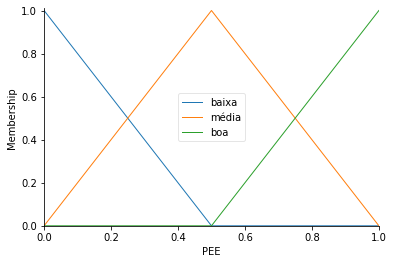

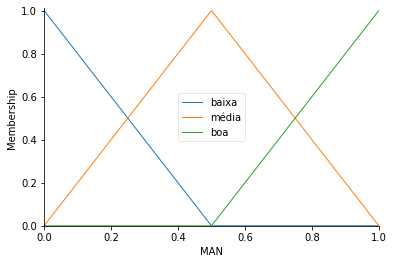

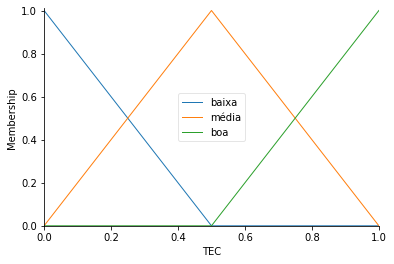

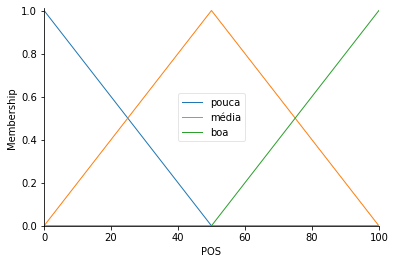

In [ ]:
PEE.view()
MAN.view()
TEC.view()
POS.view()


### Criando as regras de decisão difusas

In [ ]:
rule1 = ctrl.Rule(PEE['boa'] | TEC['boa'], POS['boa'])
rule2 = ctrl.Rule(PEE['média'], POS['média'])
rule3 = ctrl.Rule(MAN['baixa'] & TEC['baixa'], POS['pouca'])

### Criando e simulando um controlador nebuloso

In [ ]:
POS_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
POS_simulador = ctrl.ControlSystemSimulation(POS_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
POS_simulador.input['PEE'] = 0.10
POS_simulador.input['TEC'] = 0.30
POS_simulador.input['MAN'] = 0.70

# Computando o resultado
POS_simulador.compute()
print(POS_simulador.output['POS'])


50.00000000000007


### Mostrando graficamente o resultado

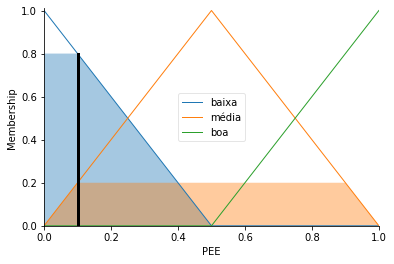

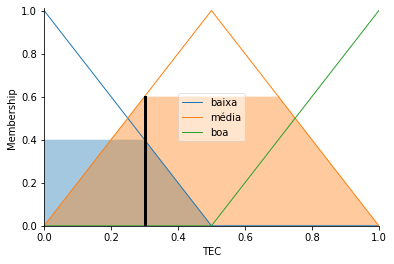

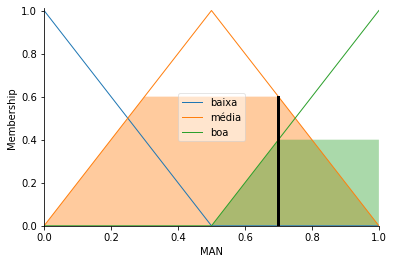

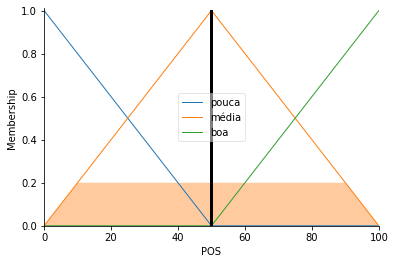

In [ ]:
PEE.view(sim=POS_simulador)
TEC.view(sim=POS_simulador)
MAN.view(sim=POS_simulador)
POS.view(sim=POS_simulador)